<pre>
1. Download all the data in this folder https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu. it contains two file both images and labels. The label file list the images and their categories in the following format:
            <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:

    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
2. On this image data, you have to train 3 types of models as given below. You have to split the data into Train and Validation data.

3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>


4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

Note: fit_genarator() method will have problems with the tensorboard histograms, try to debug it, if you could not do use histgrams=0 i.e don't include histograms, check the documentation of tensorboard for more information. 

6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>
</pre>

In [1]:
#importing Data using Curlwget extension
import os
import shutil
import pandas as pd
import numpy as np

os.makedirs("/content/data/")
%cd /content/data/
!wget --header="Host: doc-10-74-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en;q=0.9,hi-IN;q=0.8,hi;q=0.7,en-US;q=0.6" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_fgs4oo21bfgtrgbvfm89q8592ovpuhjj_nonce=cspmj62cdokde" --header="Connection: keep-alive" "https://doc-10-74-docs.googleusercontent.com/docs/securesc/ea6kib3iv3t3g486bl0s2medvtu2ccd8/c985cc1dd4hs3e2edu9sug4fahcdkl80/1627786650000/00484516897554883881/06000927637365058668/1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu?e=download&authuser=0&nonce=cspmj62cdokde&user=06000927637365058668&hash=fcln4vu924hopcmtc29q646l98r8ovbu" -c -O 'rvl-cdip.rar'
!unrar x "/content/data/rvl-cdip.rar" -d "/content/data/"
!rm "/content/data/rvl-cdip.rar"

os.listdir("/content/data/")

Streaming output truncated to the last 5000 lines.
Creating    /content/data/data_final/imagesy/y/w/v                    OK
Creating    /content/data/data_final/imagesy/y/w/v/ywv07e00           OK
Extracting  /content/data/data_final/imagesy/y/w/v/ywv07e00/2031300697.tif      95%  OK 
Creating    /content/data/data_final/imagesy/y/w/v/ywv14c00           OK
Extracting  /content/data/data_final/imagesy/y/w/v/ywv14c00/2080388930b.tif      95%  OK 
Creating    /content/data/data_final/imagesy/y/w/v/ywv15a00           OK
Extracting  /content/data/data_final/imagesy/y/w/v/ywv15a00/528410291+-0291.tif      95%  OK 
Creating    /content/data/data_final/imagesy/y/w/v/ywv90a00           OK
Extracting  /content/data/data_final/imagesy/y/w/v/ywv90a00/0060014591.tif      95%  OK 
Creating    /content/data/data_final/imagesy/y/w/v/ywv90c00           OK
Extracting  /content/data/data_final/imagesy/y/w/v/ywv90c00/13527205.tif      95%  OK 
Creating    /cont

['labels_final.csv', 'data_final']

In [2]:
import pathlib
%cd /content/data/
pathlib.Path("/data_final")
data = pd.read_csv("labels_final.csv")
data['correct_path'] = ["/content/data/data_final/"+str(i) for i in data.path]
data.head()

/content/data


,path,label,correct_path
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3,/content/data/data_final/imagesv/v/o/h/voh71d0...
1,imagesl/l/x/t/lxt19d00/502213303.tif,3,/content/data/data_final/imagesl/l/x/t/lxt19d0...
2,imagesx/x/e/d/xed05a00/2075325674.tif,2,/content/data/data_final/imagesx/x/e/d/xed05a0...
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3,/content/data/data_final/imageso/o/j/b/ojb60d0...
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7,/content/data/data_final/imagesq/q/z/k/qzk17e0...


In [3]:
from sklearn.preprocessing import OneHotEncoder
classes =np.array(data.label)
encoder= OneHotEncoder()
classes_ohe= encoder.fit_transform(classes.reshape(-1,1))

print(classes_ohe.toarray())
print(classes_ohe.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(48000, 16)


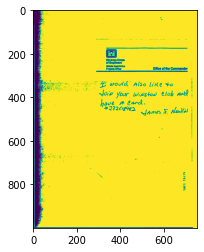

In [4]:
import matplotlib.pyplot as plt
import tifffile as tiff 

img = tiff.imread(data.correct_path[3])
plt.imshow(img)
plt.axis=None


In [5]:
import os
import glob
import shutil
import cv2
from tqdm import tqdm

list_of_heights =[]
list_of_widths= []
dir_path= '/content/data/data_final/'

for i in tqdm(data['correct_path']):
  img= cv2.imread(i)
  shape= img.shape
  list_of_heights.append(shape[0])
  list_of_widths.append(shape[1])



100%|██████████| 48000/48000 [03:04<00:00, 259.62it/s]


In [ ]:
pd.Series(list_of_heights).value_counts()

In [ ]:
print(pd.Series(list_of_widths).value_counts())
plt.hist(list_of_widths, bins= range(min(list_of_widths),max(list_of_widths)+1,1), color='red')
plt.title("Image Width Distribution")
plt.ylim((0,1500))
plt.xlim((0,1000))
plt.xlabel("Image Width")
plt.ylabel("Number of Images")
plt.show()
# np.median(list_of_widths)

In [ ]:
print("Median width:",np.median(list_of_widths))
print("Mean width:",np.mean(list_of_widths))

In [ ]:
Data=pd.DataFrame()
label_df= pd.DataFrame(classes_ohe.todense(),columns=["letter","form","email","handwritten","advertisement","scientific report","scientific publication","specification","file folder","news article","budget","invoice","presentation","questionnaire","resume","memo"])
Data['Path']=data.correct_path
Data=Data.join(label_df)
print(Data.head())

columns=["letter","form","email","handwritten","advertisement","scientific report","scientific publication","specification","file folder","news article","budget","invoice","presentation","questionnaire","resume","memo"]

In [10]:
import pathlib
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

!pip uninstall keras-preprocessing
!pip install git+https://github.com/keras-team/keras-preprocessing.git


dir_path= "/content/data/"
# for i in os.listdir(dir_path+ "/data_final"):
#     print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path+"/data_final",i))))

imageflow= ImageDataGenerator(data_format="channels_last", validation_split= 0.2)
train_image_generator= imageflow.flow_from_dataframe(dataframe= Data,x_col='Path', y_col=columns , batch_size=32, seed=0, target_size=(256,256),class_mode='raw',classes=16, subset='training')
validation_image_generator= imageflow.flow_from_dataframe(dataframe= Data,x_col='Path', y_col=columns , batch_size=32, seed=0, target_size=(256,256),class_mode='raw',classes=16, subset='validation')

Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras_Preprocessing-1.1.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras_preprocessing/*
Proceed (y/n)? y
  Successfully uninstalled Keras-Preprocessing-1.1.2
  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-jrgbbd1i
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-jrgbbd1i
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43631 sha256=8b10bb002b40d485a967e143e8a61c87f21a8a23cc60429ec52456696eab48eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzm0yix3/wheels/6d/8c/1d/f7c16ffd97b199cf4a20b04f1b9444a9390272edafb52c45f7
Successfully built Keras-Preprocessing


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  if classes and self.class_mode in {"input", "multi_output", "raw", None}:


Found 38400 validated image filenames.
Found 9600 validated image filenames.


In [11]:
##Checking time taken to load images. 
import time
start = time.time()
total_batches = 0

batches = 0
per_batch = 32
for x_batch, y_batch in train_image_generator:
    batches += 1
    if batches >= 48000/per_batch:
        total_batches = total_batches + batches
        break 
end = time.time()
duration = end-start
print("{} batches: {} s".format(total_batches, duration))
print("{:0.5f} Images/s".format(per_batch*total_batches/duration))

1500 batches: 180.61771631240845 s
265.75466 Images/s


In [12]:
48000/32

1500.0

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and a output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [14]:
#importing tensorflow
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,Layer, Conv1D
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
#Model1
import os
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer

vgg_16layer = VGG16(include_top=False,input_shape =(256,256,3))

for layer in vgg_16layer.layers:
  layer.trainable = False

for i, layer in enumerate(vgg_16layer.layers):
    print(i, layer.name, layer.trainable)


# vgg_16layer.summary()
# input_layer = Input(shape=(600,457,3),name='Input_Layer')

vgg = vgg_16layer.output

Conv = Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='same',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg)

Pool1 = MaxPool2D(pool_size=(2,2),name='Pool1')(Conv)

flatten = Flatten(name='Flatten')(Pool1)

FC1 = Dense(units=64,activation='relu',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=32),name='FC1')(flatten)

FC2 = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_uniform(seed=33),name='FC2')(FC1)

Out = Dense(units=16,activation='softmax',name='Output')(FC2)

#Creating a model
model = Model(inputs=vgg_16layer.input,outputs=Out)



58892288/58889256 [==============================] - 0s 0us/step
0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
#compiling 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import TensorBoard
import datetime

!rm -rf ./logs/
logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%reload_ext tensorboard
%tensorboard --logdir $logdir

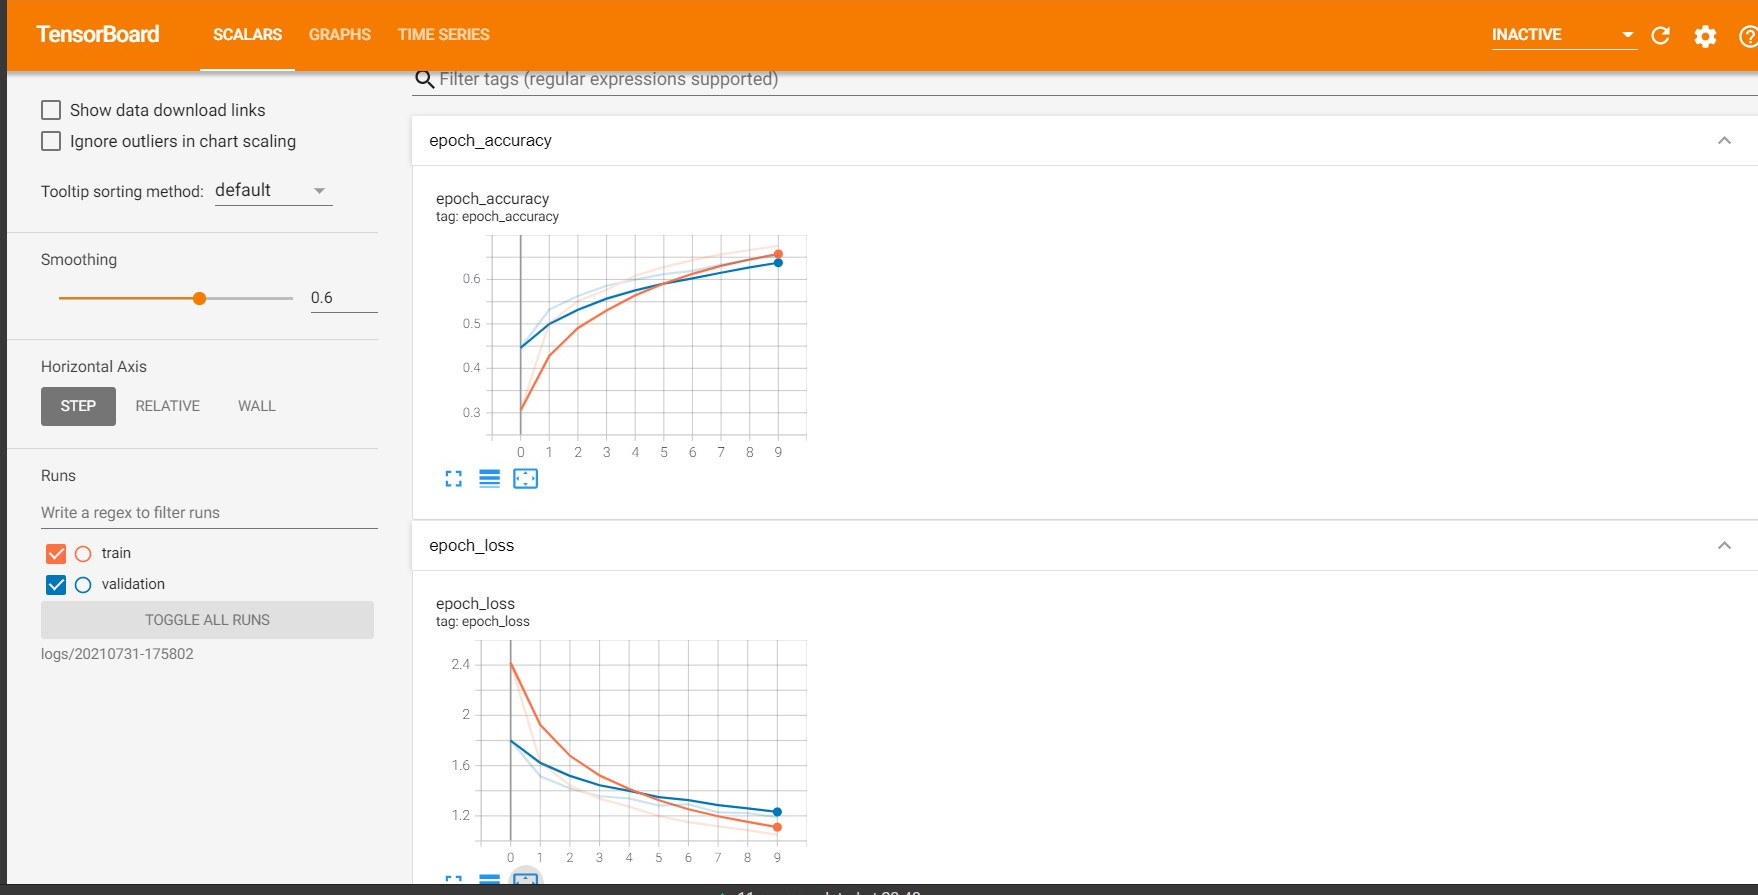

## Model1 Analysis
The Model 1 whcihc uses the weights from Pretrained VGG16 network tends to perform well on our Image Classification task.
THe model achieves more than 60% accuracy in 10th epoch.

### fitting generator
model.fit_generator(train_image_generator,validation_data = validation_image_generator,steps_per_epoch=216,epochs=10,callbacks=TensorBoard(logdir,histogram_freq=0))

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer. any FC layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>
3. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [25]:
#Model2
import os
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer

vgg_16layer = VGG16(include_top=False, input_shape=((256,256,3)))

for layer in vgg_16layer.layers:
  layer.trainable = False

for i, layer in enumerate(vgg_16layer.layers):
    print(i, layer.name, layer.trainable)

# input_layer = Input(shape=(600,457,3),name='Input_Layer')

vgg = vgg_16layer.output

Conv = Conv2D(filters=4096,kernel_size=8,strides=(1,1),padding='valid',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg)

Conv2 = Conv2D(filters=4096,kernel_size=1,strides=(1,1),padding='valid',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv2')(Conv)
# Out = Conv1D(filters=16,strides =1, kernel_size=1, activation='softmax')(Conv2)
flatten = Flatten(name='Flatten')(Conv2)

Out = Dense(units=16,activation='softmax',name='Output')(flatten)

#Creating a model
model2 = Model(inputs=vgg_16layer.input,outputs=Out)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [26]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [27]:
#compiling 
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import TensorBoard
import datetime

!rm -rf ./logs_2/
logdir=os.path.join("logs_2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%reload_ext tensorboard
%tensorboard --logdir $logdir

In [29]:
##fitting generator
model2.fit_generator(train_image_generator,validation_data = validation_image_generator,steps_per_epoch=216,epochs=10,callbacks=TensorBoard(logdir,histogram_freq=0))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
216/216 [==============================] - 137s 630ms/step - loss: 12.1158 - accuracy: 0.3882 - val_loss: 2.4501 - val_accuracy: 0.3953
Epoch 2/10
216/216 [==============================] - 136s 629ms/step - loss: 2.1440 - accuracy: 0.4381 - val_loss: 1.8886 - val_accuracy: 0.4528
Epoch 3/10
216/216 [==============================] - 136s 631ms/step - loss: 2.0840 - accuracy: 0.4812 - val_loss: 1.9061 - val_accuracy: 0.4604
Epoch 4/10
216/216 [==============================] - 136s 631ms/step - loss: 1.8014 - accuracy: 0.5149 - val_loss: 1.5668 - val_accuracy: 0.5301
Epoch 5/10
216/216 [==============================] - 136s 630ms/step - loss: 1.4509 - accuracy: 0.5666 - val_loss: 1.3888 - val_accuracy: 0.5902
Epoch 6/10
216/216 [==============================] - 136s 632ms/step - loss: 1.3355 - accuracy: 0.5969 - val_loss: 1.3782 - val_accuracy: 0.5867
Epoch 7/10
216/216 [==============================] - 136s 630ms/step - loss: 1.1616 - accuracy: 0.6473 - val_loss: 1.2409 

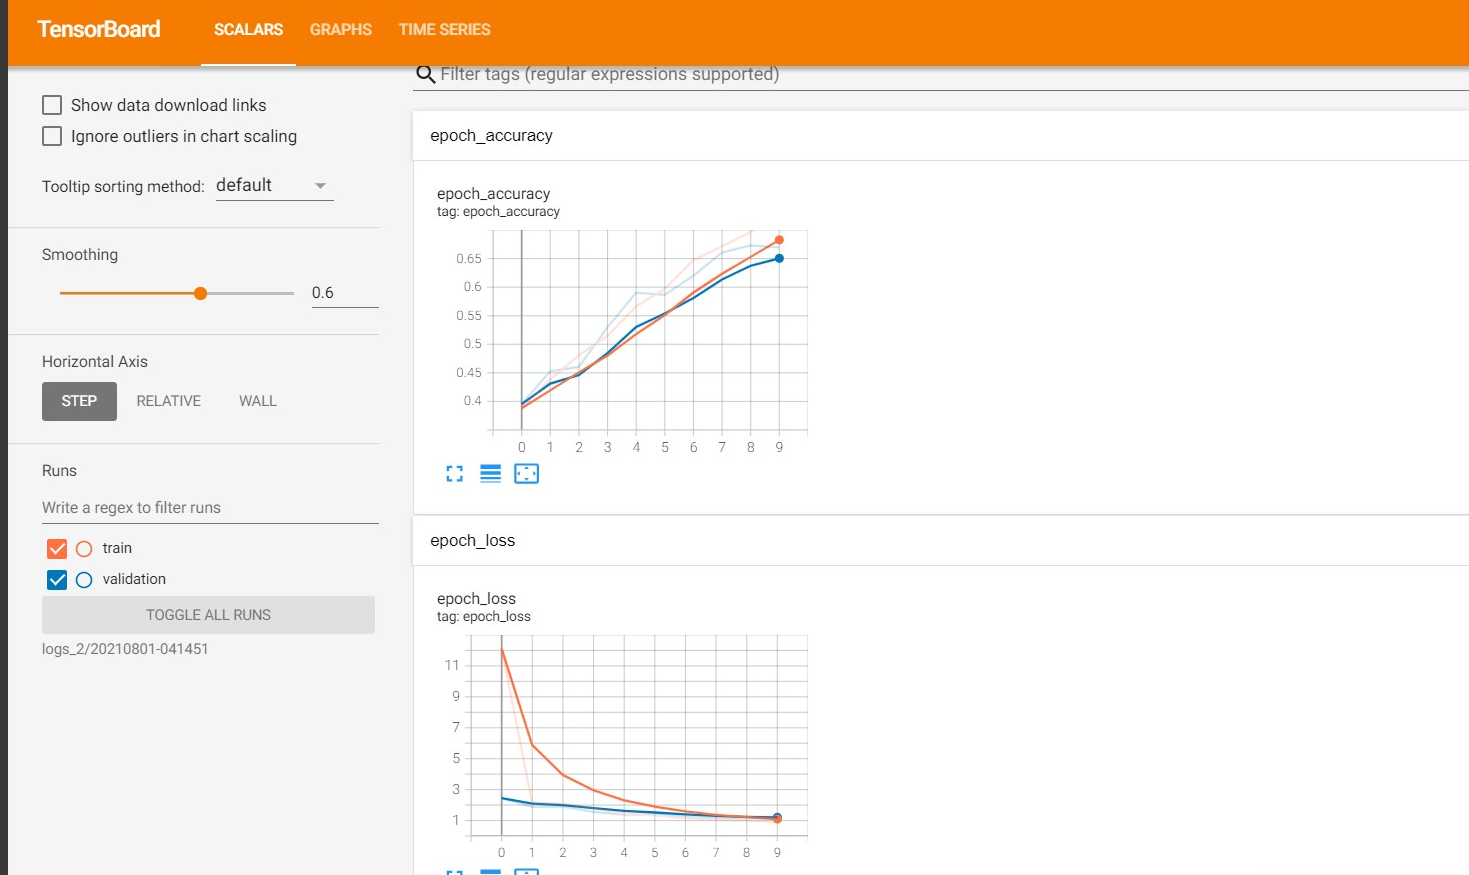

## Model2 Analysis
The Model 2 is same as model 1 , the only change is in the last layer where instead of using the Fully connected Layers we are using Convolution layers so as to capture the Local/Spatial information better than what fully connected layer captures.
Here also, the model tends to perform better and achieves more than 60% accuracy in 7th epoch only

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [40]:
#Model3
import os
os.environ['PYTHONHASHSEED'] = '0'
##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#Input layer

vgg_16layer = VGG16(include_top=False, input_shape=((256,256,3)))

for layer in vgg_16layer.layers[:13]:
  layer.trainable = False

for i, layer in enumerate(vgg_16layer.layers):
    print(i, layer.name, layer.trainable)

# input_layer = Input(shape=(600,457,3),name='Input_Layer')

vgg = vgg_16layer.output

Conv = Conv2D(filters=4096,kernel_size=8,strides=(1,1),padding='valid',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv1')(vgg)

Conv2 = Conv2D(filters=4096,kernel_size=1,strides=(1,1),padding='valid',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0),name='Conv2')(Conv)
# Out = Conv1D(filters=16,strides =1, kernel_size=1, activation='softmax')(Conv2)
flatten = Flatten(name='Flatten')(Conv2)

Out = Dense(units=16,activation='softmax',name='Output')(flatten)

#Creating a model
model3 = Model(inputs=vgg_16layer.input,outputs=Out)


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [41]:
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [42]:
#compiling 
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import TensorBoard
import datetime

!rm -rf ./logs_3/
logdir=os.path.join("logs_3", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
%reload_ext tensorboard
%tensorboard --logdir $logdir

In [44]:
##fitting generator
model3.fit_generator(train_image_generator,validation_data = validation_image_generator,steps_per_epoch=216,epochs=4,callbacks=TensorBoard(logdir,histogram_freq=0))

ERROR:tensorflow:Failed to start profiler: Another profiler is running.
Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


  1/216 [..............................] - ETA: 5:07 - loss: 14.5333 - accuracy: 0.1250WARNING:tensorflow:Trace already enabled
ERROR:tensorflow:Failed to start profiler: Another profiler is running.
216/216 [==============================] - 192s 887ms/step - loss: 181.2167 - accuracy: 0.0657 - val_loss: 2.7755 - val_accuracy: 0.0668
Epoch 2/4
216/216 [==============================] - 194s 899ms/step - loss: 2.7784 - accuracy: 0.0600 - val_loss: 2.7851 - val_accuracy: 0.0668
Epoch 3/4
216/216 [==============================] - 194s 898ms/step - loss: 91.1906 - accuracy: 0.0606 - val_loss: 2.7731 - val_accuracy: 0.0613
Epoch 4/4
216/216 [==============================] - 194s 901ms/step - loss: 2.7730 - accuracy: 0.0626 - val_loss: 2.7732 - val_accuracy: 0.0601


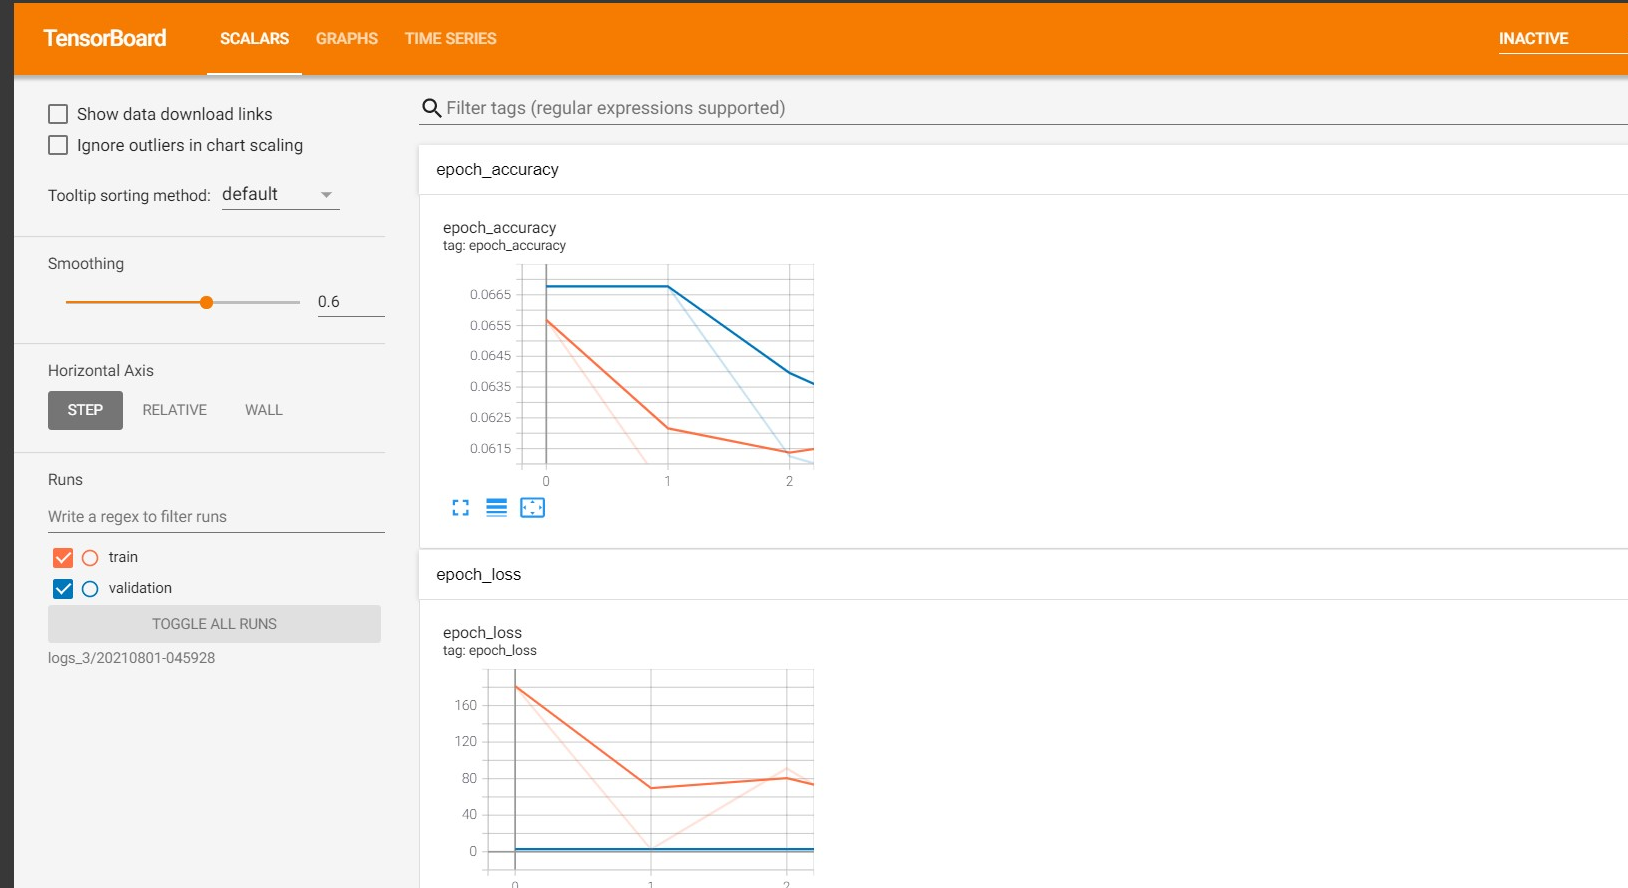

## Model3 Analysis
Here in the Model3, we have trained the last 6 layers of VGG16 also in addition to the convolution layers trained in model2. So, here model shows low performance as compared to model2. in model 3 we achieve approx 6% accuracy in epoch 4.